In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
import re
pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', 150)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data = pd.read_csv(r'D:\Machine Learning 3\results.csv')

In [4]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
data.isna().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [6]:
data[data['half'] == '-'].head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
3189,-,"Haushalter, Jeff",647,-,M,47,195.82,3622,4815,NaN,160.48,5463,7.48,GA,-,-,-,-,USA,Atlanta,184.62
4669,42.33,"Chow, Brian",2625,106.40,M,23,193.70,5310,4447,NaN,155.92,4963,7.40,MA,129.05,21.15,-,84.93,USA,Cambridge,182.33
6060,41.38,"Rapacz, Jeff",1353,108.80,M,43,209.12,6892,7074,NaN,159.90,9036,7.98,MN,133.50,20.78,-,86.08,USA,Otsego,198.60
7417,-,"Dennier, Ana C",1650,-,F,42,264.28,8452,9412,NaN,218.07,22540,10.08,ON,-,-,-,-,CAN,Toronto,251.72
8190,55.47,"Lind, Paul",2443,150.12,M,46,272.40,9341,13723,NaN,216.80,23816,10.40,ID,182.33,26.78,-,115.32,USA,Challis,253.67


Boston Marathon further split numeric BIB athletes into diffirent categories:
* 18 - 39 (0)
* 40 - 44 (1)
* 45 - 49 (2)
* 50 - 54 (3)
* 55 - 59 (4)
* 60 - 64 (5)
* 65 - 69 (6)
* 70 - 74 (7)
* 75 - 79 (8)
* 80+ (9)

In [7]:
# insert age group variable
data.loc[:,'age_group'] = pd.cut(data.age, bins = [17,39,44,49,54,59,64,69,74,79,100], labels = False)

In [8]:
# convert str to float on some columns
data['10k'] = pd.to_numeric(data.loc[:,'10k'], 'float')
data['25k'] = pd.to_numeric(data.loc[:,'25k'], 'float')
data['35k'] = pd.to_numeric(data.loc[:,'35k'], 'float')
data['30k'] = pd.to_numeric(data.loc[:,'30k'], 'float')
data['5k'] = pd.to_numeric(data.loc[:,'5k'], 'float')
data['half'] = pd.to_numeric(data.loc[:,'half'], 'float')
data['20k'] = pd.to_numeric(data.loc[:,'20k'], 'float')
data['40k'] = pd.to_numeric(data.loc[:,'40k'], 'float')

In [9]:
data.count()

10k          31934
name         31984
division     31984
25k          31768
gender       31984
age          31984
official     31984
bib          31984
genderdiv    31984
ctz           1244
35k          31950
overall      31984
pace         31984
state        29408
30k          31944
5k           31932
half         31912
20k          31933
country      31984
city         31983
40k          31945
age_group    31984
dtype: int64

In [10]:
# drop NaN
data = data.dropna(subset = ['10k','25k','35k','30k','5k','half','20k','40k'])

Boston Marathon have serveral divisions include: wheelchair division (W), elite woman (F) and other include elite man athletes (numeric)

In [11]:
# number of BIB starting with W (wheelchair division) and F (elite division)
data[data.bib.str.contains(re.compile('[a-zA-Z]\w+'))].bib.str.get(0).value_counts()

W    53
F    48
Name: bib, dtype: int64

Split data into sub-categories: wheelchair division (1), elite woman(2) and others (0)

In [12]:
data['sub_cat'] = np.zeros(len(data))

In [13]:
# split divisions into 3 catogories: W, F and others
data['sub_cat'] = np.where(data.bib.str.contains(re.compile('W\w+')),1,
                          np.where(data.bib.str.contains(re.compile('F\w+')),2,0))

In [14]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,age_group,sub_cat
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,2,1
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,0,2
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,1,1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,0,2
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,1,1


DATA DESCRIBE

import plotly.plotly as py
import plotly.graph_objs as go

import plotly
plotly.tools.set_credentials_file(username='mdphap', api_key='NGGXdksEqD4o49TXgVzj')

player_by_country = pd.DataFrame({'country':data.country.value_counts().index,
                                 'players':data.country.value_counts().values})

country_players = [
    dict(
    type = 'choropleth',
    locations = player_by_country['country'],
    z = player_by_country['players'],
    text = player_by_country['country'],
    autocolorscale = True,
    reversescale  = False,
    marker = dict(
    line = dict(
    color = 'rgb(180,180,180)',
    width = 0.5)),
    colorbar = dict(
    autotick = True,
    title = 'Number of players per country'))]

layout = dict(
title = 'Number of Boston marathon participants per country',
    autosize = False,
    width = 1200,
    height = 800,
geo = dict(
showframe = False,
showcoastline = False,
projection = dict(
type = 'Mercator')))

fig = dict(data = country_players, layout = layout)
py.iplot(fig, validate = False, filename = 'boston-2014-participants')

Phần lớn các vận động viên tham gia thuộc Mỹ và Canada

player_by_country = player_by_country.drop(labels = [0,1], axis = 0)

country_players = [
    dict(
    type = 'choropleth',
    locations = player_by_country['country'],
    z = player_by_country['players'],
    text = player_by_country['country'],
    autocolorscale = True,
    reversescale  = False,
    marker = dict(
    line = dict(
    color = 'rgb(180,180,180)',
    width = 0.5)),
    colorbar = dict(
    autotick = True,
    title = 'Number of players per country'))]

layout = dict(
title = 'Number of Boston marathon participants per country (exc USA & CAN)',
    autosize = False,
    width = 1200,
    height = 800,
geo = dict(
showframe = False,
showcoastline = False,
projection = dict(
type = 'Mercator')))

fig = dict(data = country_players, layout = layout)
py.iplot(fig, validate = False, filename = 'boston-2014-participants-excUSACAN')

In [15]:
# thành tích của các VĐV bình thường phân theo độ tuổi (không tính W & F)
data.groupby(['sub_cat', 'age_group']).official.describe()

count   mean   std    min    25%    50%    75%    max
sub_cat age_group                                                          
0       0         12,732.00 236.47 54.21 128.62 195.30 222.28 272.34 534.22
        1          4,908.00 237.20 48.86 139.80 200.88 225.75 263.22 425.47
        2          5,165.00 239.40 44.64 144.65 207.30 230.07 260.48 438.08
        3          3,919.00 244.58 45.14 154.68 211.86 234.45 268.06 538.88
        4          2,517.00 254.22 44.52 161.63 221.10 245.12 277.33 444.40
        5          1,434.00 267.79 42.69 179.13 236.76 260.51 291.31 434.75
        6            646.00 281.57 42.55 182.37 251.16 275.28 304.59 430.58
        7            175.00 299.40 47.86 208.18 264.02 291.97 330.97 457.55
        8             44.00 305.42 51.69 219.13 262.52 296.78 341.71 424.13
        9              8.00 350.22 53.61 238.92 335.62 353.35 379.38 418.15
1       0             36.00 102.12 17.73  84.65  92.03  98.28 104.24 169.20
        1              6.00 106.59 39.78  80.60  81.23  92.45 107.82 183.62
        2              7.00  98.20 12.25  85.25  88.18  95.28 106.58 117.40
        3              3.00 163.13 30.13 131.38 149.03 166.68 179.00 191.33
        4              1.00 163.20   nan 163.20 163.20 163.20 163.20 163.20
2       0             36.00 154.06 10.79 138.95 143.77 152.63 162.78 177.88
        1              8.00 167.38 10.41 156.78 160.57 165.31 171.69 188.57
        2              3.00 171.49  3.22 167.78 170.53 173.27 173.35 173.43
        4              1.00 177.73   nan 177.73 177.73 177.73 177.73 177.73

- Các VĐV thuộc nhóm tuổi 18-39 tham gia nhiều nhất và có thành tính tốt nhất trong từng hạng mục
- Các nhóm tuổi lớn hơn có thời gian hoàn thành TB cao hơn
- Các VĐV thuộc nhóm F có thời gian hoàn thành TB thấp đáng kể so với nhóm 0
- Độ lệch chuẩn của nhóm W và F thấp hơn -> mức độ cạnh tranh cao hơn

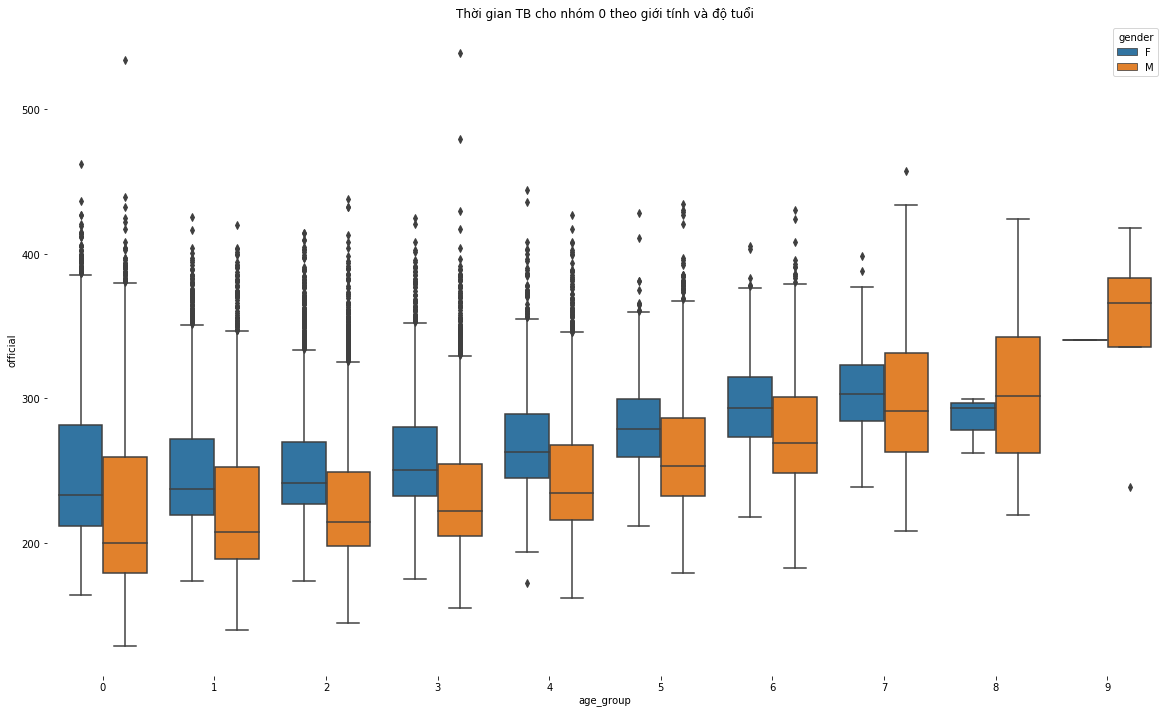

In [16]:
f, ax = plt.subplots(figsize = (20,12))
sb.boxplot(x='age_group',y='official',data=data[data.sub_cat == 0],hue='gender',hue_order = ['F','M'])
sb.despine(left=True,bottom=True)
ax.set_title('Thời gian TB cho nhóm 0 theo giới tính và độ tuổi')
plt.show()

* Các VĐV nữ có thời gian hoàn thành vòng đua cao hơn các VĐV nam ở từng nhóm tuổi.
* Thời gian hoàn thành vòng đua tăng lên khi các VĐV lớn tuổi hơn.
* Kích thước boxplot nhỏ nhất ở nhóm tuổi 2 (45-49 tuổi) cho cả nam và nữ.
* Boxplot đối với các VĐV nam tăng trở lại từ nhóm 2 trở lên nhưng tương đối ổn định với các VĐV nữ.
* Lower whiskey tăng theo nhóm tuổi nhưng Upper whiskey giảm đạt min ở nhóm 2 sau đó tăng dần.
* Các outlier xuất hiện nhiều ở nhóm tuổi trẻ và ít dần khi nhóm tuổi tăng lên.

==> meaning behind???

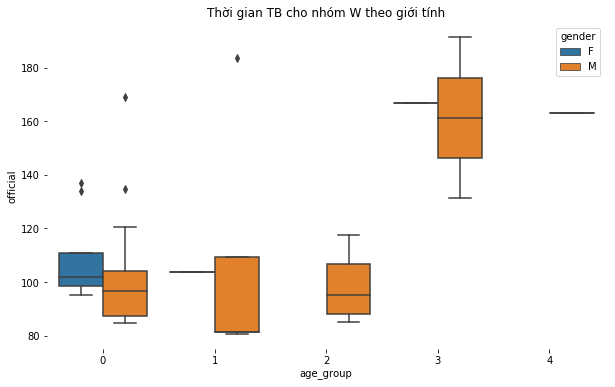

In [17]:
f, ax = plt.subplots(figsize = (10,6))
sb.boxplot(x='age_group',y='official',data=data[data.sub_cat == 1],hue='gender',hue_order = ['F','M'])
sb.despine(left=True,bottom=True)
ax.set_title('Thời gian TB cho nhóm W theo giới tính')
plt.show()

* Nhóm W gồm chủ yếu là các VĐV nam và trong lứa tuổi từ 18-39 (nhóm 0)

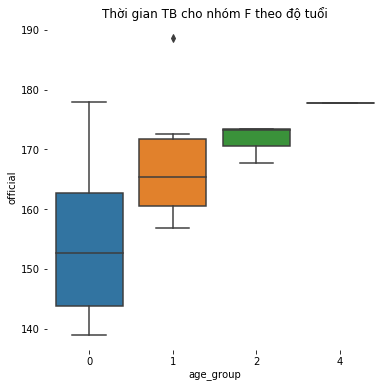

In [18]:
f, ax = plt.subplots(figsize = (6,6))
sb.boxplot(x='age_group',y='official',data=data[data.sub_cat == 2])
sb.despine(left=True,bottom=True)
ax.set_title('Thời gian TB cho nhóm F theo độ tuổi')
plt.show()

* Sự chênh lệch giữa các lứa tuổi lớn hơn so với nhóm VĐV bình thường.

official_by_country = pd.DataFrame({'country':data[data.sub_cat == 0].groupby('country').official.mean().index,
                                 'official_mean':data[data.sub_cat == 0].groupby('country').official.mean().values})

country_official = [
    dict(
    type = 'choropleth',
    locations = official_by_country['country'],
    z = official_by_country['official_mean'],
    text = official_by_country['country'],
    autocolorscale = True,
    reversescale  = True,
    marker = dict(
    line = dict(
    color = 'rgb(180,180,180)',
    width = 0.5)),
    colorbar = dict(
    autotick = True,
    title = 'Mean official time per country'))]

layout = dict(
title = 'Mean official time per country for normal athletes',
    autosize = False,
    width = 1200,
    height = 800,
geo = dict(
showframe = False,
showcoastline = False,
projection = dict(
type = 'Mercator')))

fig = dict(data = country_official, layout = layout)
py.iplot(fig, validate = False, filename = 'boston-2014-official-time')

* Các VĐV đến từ các quốc gia châu Phi có thành tích tốt nhất, sau đó là các quốc gia Nam Mỹ, Bắc Âu và Nga.
* Các quốc gia Bắc Mỹ, Tây Âu và châu Á nói chung có thành tích xấp xỉ nhau.

official_by_country_F = pd.DataFrame({'country':data[data.sub_cat == 2].groupby('country').official.mean().index,
                                 'official_mean':data[data.sub_cat == 2].groupby('country').official.mean().values})

country_official_F = [
    dict(
    type = 'choropleth',
    locations = official_by_country_F['country'],
    z = official_by_country_F['official_mean'],
    text = official_by_country_F['country'],
    autocolorscale = True,
    reversescale  = True,
    marker = dict(
    line = dict(
    color = 'rgb(180,180,180)',
    width = 0.5)),
    colorbar = dict(
    autotick = True,
    title = 'Mean official time per country'))]

layout = dict(
title = 'Mean official time per country for elite woman athletes',
    autosize = False,
    width = 1200,
    height = 800,
geo = dict(
showframe = False,
showcoastline = False,
projection = dict(
type = 'Mercator')))

fig = dict(data = country_official_F, layout = layout)
py.iplot(fig, validate = False, filename = 'boston-2014-official-time-F')

Kết luận tương tự như trên

official_by_country_W = pd.DataFrame({'country':data[data.sub_cat == 1].groupby('country').official.mean().index,
                                 'official_mean':data[data.sub_cat == 1].groupby('country').official.mean().values})

country_official_W = [
    dict(
    type = 'choropleth',
    locations = official_by_country_W['country'],
    z = official_by_country_W['official_mean'],
    text = official_by_country_W['country'],
    autocolorscale = True,
    reversescale  = True,
    marker = dict(
    line = dict(
    color = 'rgb(180,180,180)',
    width = 0.5)),
    colorbar = dict(
    autotick = True,
    title = 'Mean official time per country'))]

layout = dict(
title = 'Mean official time per country for wheelchair division',
    autosize = False,
    width = 1200,
    height = 800,
geo = dict(
showframe = False,
showcoastline = False,
projection = dict(
type = 'Mercator')))

fig = dict(data = country_official_W, layout = layout)
py.iplot(fig, validate = False, filename = 'boston-2014-official-time-W')

* Trong hạng mục whelchair không có sự tham gia của các VĐV châu Phi và Bắc Âu
* Các VĐV Tây Âu và châu Á có thành tích tốt nhất, kế đến là Canada

CLUSTERING
* Đặt vấn đề:
 - Việc phân nhóm các VĐV theo giới tính và độ tuổi không giúp ích nhiều cho việc phân loại các VĐV theo thành tích.

* Câu hỏi:
 - Có thể sử dụng mô hình phân nhóm nào để việc phân loại các VĐV theo thành tích hiệu quả hơn?
 - Nhận diện các chiến thuật chạy hữu hiệu (nếu có thể)
 
* Giả thuyết:
 - Thành tích chạy của VĐV chịu ảnh hưởng bởi giới tính và độ tuổi.
 - Ngoài ra, thành tích chạy của VĐV còn chịu ảnh hưởng từ chiến thuật chạy marathon được áp dụng.
 
* Mô hình:
 - Biến phụ thuộc: overall được phân thành 4 cấp độ (top 1%: 0, top 5%: 1, top 10%: 2 và bottom 85%: 3)
 - Chiến thuật chạy marathon được đo lường bằng tổ hợp vector vận tốc TB và gia tốc trên từng quãng đường của cuộc đua. Đây cũng là biến độc lập của mô hình.
 - Ngoài ra, biến độc lập còn có age_group và gender.
 

In [19]:
# add pace per milestone
# pace: miles per hour
data['pace_5k'] = ((5*0.62)/data['5k'])*60
data['pace_10k'] = ((5*0.62)/(data['10k'] - data['5k']))*60
data['pace_20k'] = ((10*0.62)/(data['20k'] - data['10k']))*60
data['pace_25k'] = ((5*0.62)/(data['25k'] - data['20k']))*60
data['pace_30k'] = ((5*0.62)/(data['30k'] - data['25k']))*60
data['pace_35k'] = ((5*0.62)/(data['35k'] - data['30k']))*60
data['pace_40k'] = ((5*0.62)/(data['40k'] - data['35k']))*60
data['pace_last'] = ((26.22 - 40*0.62)/(data['official'] - data['40k']))*60

In [20]:
data['pace_35k'].describe()

count   31,649.00
mean         6.17
std          1.50
min          1.13
25%          5.05
50%          6.18
75%          7.18
max         17.22
Name: pace_35k, dtype: float64

In [21]:
data_2 = data.loc[:, ['overall','gender','age_group','sub_cat', 'pace_5k','pace_10k','pace_20k','pace_25k','pace_30k','pace_35k','pace_40k','pace_last']]

In [22]:
# thay đổi tốc độ chặng 5k -> 10k
data_2['acc_10k'] = data_2['pace_10k']/data_2['pace_5k']-1
# thay đổi tốc độ chặng 10k -> 20k
data_2['acc_20k'] = data_2['pace_20k']/data_2['pace_10k']-1
# thay đổi tốc độ chặng 20k -> 25k
data_2['acc_25k'] = data_2['pace_25k']/data_2['pace_20k']-1
# thay đổi tốc độ chặng 25k -> 30k
data_2['acc_30k'] = data_2['pace_30k']/data_2['pace_25k']-1
# thay đổi tốc độ chặng 30k -> 35k
data_2['acc_35k'] = data_2['pace_35k']/data_2['pace_30k']-1
# thay đổi tốc độ chặng 35k -> 40k
data_2['acc_40k'] = data_2['pace_40k']/data_2['pace_35k']-1
# thay đổi tốc độ chặng 40k -> về đích
data_2['acc_last'] = data_2['pace_last']/data_2['pace_40k']-1

In [23]:
# encode biến phụ thuộc
data_2['overall_encode'] = np.where(data_2.overall <= 300,0,np.where(data_2.overall <= 1500,1,np.where(data_2.overall <= 3000,2,3)))

In [24]:
# encode biến gender
data_2['gender'] = pd.factorize(data_2['gender'])[0]

In [25]:
data_2.head()

,overall,gender,age_group,sub_cat,pace_5k,pace_10k,pace_20k,pace_25k,pace_30k,pace_35k,pace_40k,pace_last,acc_10k,acc_20k,acc_25k,acc_30k,acc_35k,acc_40k,acc_last,overall_encode
0,8,0,2,1,23.19,19.89,18.34,18.56,16.16,15.22,20.60,17.68,-0.14,-0.08,0.01,-0.13,-0.06,0.35,-0.14,0
1,21,1,0,2,11.47,11.37,11.19,11.20,11.01,10.92,11.82,12.44,-0.01,-0.02,0.00,-0.02,-0.01,0.08,0.05,0
2,1,0,1,1,24.00,20.97,19.10,19.18,17.46,16.96,21.43,18.93,-0.13,-0.09,0.00,-0.09,-0.03,0.26,-0.12,0
3,27,1,0,2,11.48,11.36,11.18,11.20,11.01,10.92,11.22,11.17,-0.01,-0.02,0.00,-0.02,-0.01,0.03,-0.00,0
4,2,0,1,1,23.19,20.44,19.12,19.00,17.45,17.22,20.92,18.89,-0.12,-0.06,-0.01,-0.08,-0.01,0.21,-0.10,0


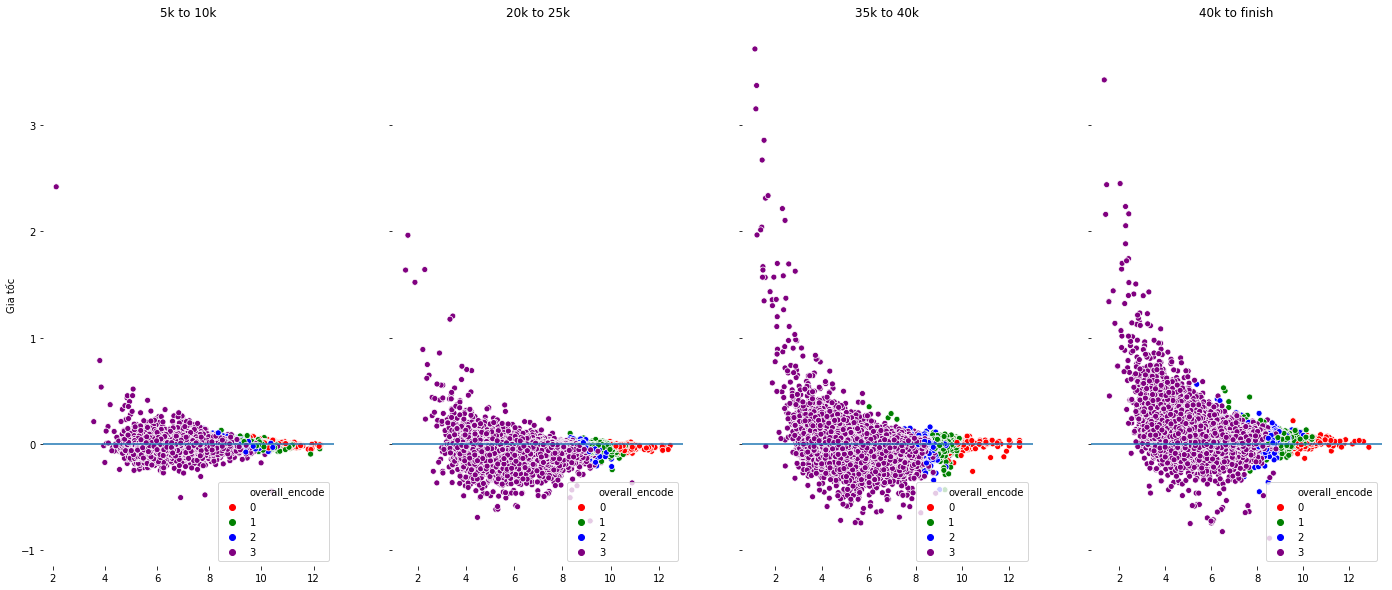

In [26]:
f,(ax,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize = (24,10), sharey=True)
sb.scatterplot(ax=ax,x='pace_5k',y='acc_10k',data=data_2[(data_2.sub_cat == 0)],hue='overall_encode',palette=['red','green','blue','purple'])
sb.scatterplot(ax=ax2,x='pace_25k',y='acc_30k',data=data_2[(data_2.sub_cat == 0)],hue='overall_encode',palette=['red','green','blue','purple'])
sb.scatterplot(ax=ax3,x='pace_35k',y='acc_40k',data=data_2[(data_2.sub_cat == 0)],hue='overall_encode',palette=['red','green','blue','purple'])
sb.scatterplot(ax=ax4,x='pace_40k',y='acc_last',data=data_2[(data_2.sub_cat == 0)],hue='overall_encode',palette=['red','green','blue','purple'])

ax.set_title('5k to 10k')
ax.axhline(y=0)
ax2.set_title('20k to 25k')
ax2.axhline(y=0)
ax3.set_title('35k to 40k')
ax3.axhline(y=0)
ax4.set_title('40k to finish')
ax4.axhline(y=0)
sb.despine(left=True, bottom=True)
ax.set(ylabel='Gia tốc',xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax.legend(ncol=1, loc="lower right", frameon=True)
ax2.legend(ncol=1, loc="lower right", frameon=True)
ax3.legend(ncol=1, loc="lower right", frameon=True)
ax4.legend(ncol=1, loc="lower right", frameon=True)
plt.show()

KNN WITH QUANTILE LABELING

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score

In [28]:
data_2 = data_2[data_2['sub_cat'] == 0]

In [29]:
data_2_X_train, data_2_X_test, data_2_Y_train, data_2_Y_test = train_test_split(data_2.drop(columns = ['overall','sub_cat','overall_encode']),
                                                                                data_2['overall_encode'], test_size = 0.2, random_state = 0)

In [30]:
knn_val = []
scores = []
for k in range(1,100):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'auto')
    score = cross_val_score(KNN, data_2_X_train, data_2_Y_train, cv=10, scoring='f1_weighted')
    scores.append(score.mean())
    knn_val.append(k)

    knn_val  scores
22       23    0.99


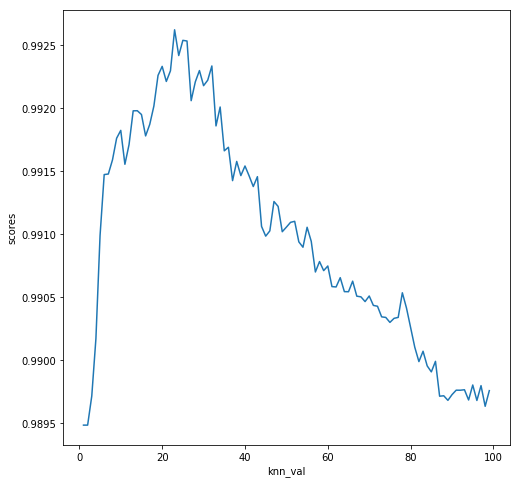

In [31]:
knn_val_scores = pd.DataFrame({'knn_val':knn_val,'scores':scores})
print(knn_val_scores[knn_val_scores.scores == knn_val_scores.scores.max()])

f,ax = plt.subplots(figsize = (8,8))
sb.lineplot(x='knn_val',y='scores',data=knn_val_scores)
plt.show()

In [32]:
from sklearn.metrics import classification_report

KNN = KNeighborsClassifier(n_neighbors = 23, weights = 'distance', algorithm = 'auto')
KNN.fit(data_2_X_train, data_2_Y_train)
KNN_predict = KNN.predict(data_2_X_test)
print(classification_report(data_2_Y_test, KNN_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        51
           1       0.96      0.93      0.94       238
           2       0.90      0.95      0.92       291
           3       1.00      1.00      1.00      5730

   micro avg       0.99      0.99      0.99      6310
   macro avg       0.97      0.93      0.95      6310
weighted avg       0.99      0.99      0.99      6310



USE K-MEANS TO BETTER FURTHER LABELING ATHLETES

In [33]:
k_val = []
silhouette = []
for k in range(2,15):
    KMEAN = KMeans(n_clusters = k, precompute_distances = 'auto', random_state = 0)
    labels = KMEAN.fit_predict(data_2.drop(columns = ['overall','sub_cat','overall_encode','gender','age_group']))
    silhouette_avg = silhouette_score(data_2.drop(columns = ['overall','sub_cat','overall_encode','gender','age_group']), labels)
    print('For k_val: %d - Silhouette value: %.2f' %(k, silhouette_avg))
    k_val.append(k)
    silhouette.append(silhouette_avg)

For k_val: 2 - Silhouette value: 0.48
For k_val: 3 - Silhouette value: 0.43
For k_val: 4 - Silhouette value: 0.37
For k_val: 5 - Silhouette value: 0.33
For k_val: 6 - Silhouette value: 0.29
For k_val: 7 - Silhouette value: 0.29
For k_val: 8 - Silhouette value: 0.27
For k_val: 9 - Silhouette value: 0.26
For k_val: 10 - Silhouette value: 0.26
For k_val: 11 - Silhouette value: 0.25
For k_val: 12 - Silhouette value: 0.24
For k_val: 13 - Silhouette value: 0.22
For k_val: 14 - Silhouette value: 0.22


In [34]:
# chạy lại với tham số n-clusters = 3
KMEAN = KMeans(n_clusters = 3, precompute_distances = 'auto', random_state = 0)
labels = KMEAN.fit_predict(data_2.drop(columns = ['overall','sub_cat','overall_encode','gender','age_group']))

In [35]:
# thêm cột labels vào data_2
data_2['predict_labels'] = labels

In [36]:
data_2.predict_labels.value_counts()

2    13848
1    10290
0     7410
Name: predict_labels, dtype: int64

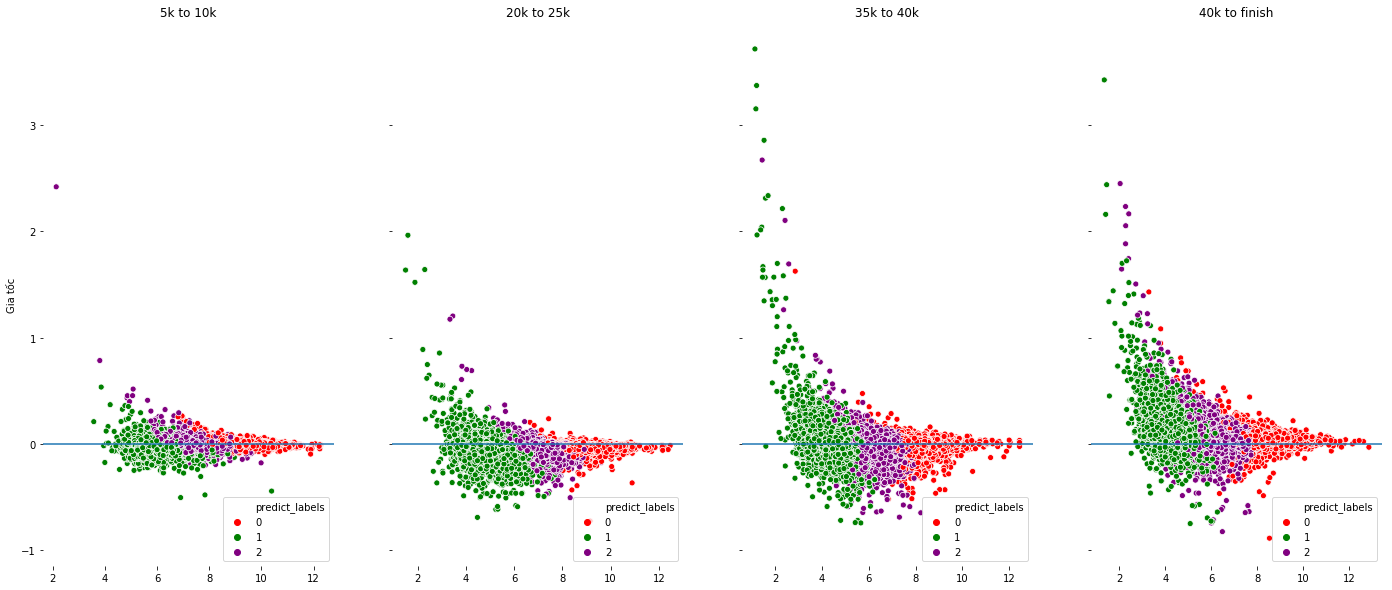

In [37]:
f,(ax,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize = (24,10), sharey=True)
sb.scatterplot(ax=ax,x='pace_5k',y='acc_10k',data=data_2,hue='predict_labels',palette=['red','green','purple'])
sb.scatterplot(ax=ax2,x='pace_25k',y='acc_30k',data=data_2,hue='predict_labels',palette=['red','green','purple'])
sb.scatterplot(ax=ax3,x='pace_35k',y='acc_40k',data=data_2,hue='predict_labels',palette=['red','green','purple'])
sb.scatterplot(ax=ax4,x='pace_40k',y='acc_last',data=data_2,hue='predict_labels',palette=['red','green','purple'])

ax.set_title('5k to 10k')
ax.axhline(y=0)
ax2.set_title('20k to 25k')
ax2.axhline(y=0)
ax3.set_title('35k to 40k')
ax3.axhline(y=0)
ax4.set_title('40k to finish')
ax4.axhline(y=0)
sb.despine(left=True, bottom=True)
ax.set(ylabel='Gia tốc',xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax.legend(ncol=1, loc="lower right", frameon=True)
ax2.legend(ncol=1, loc="lower right", frameon=True)
ax3.legend(ncol=1, loc="lower right", frameon=True)
ax4.legend(ncol=1, loc="lower right", frameon=True)
plt.show()

RUN WITH ORI DATA

In [38]:
data_3 = data.loc[:,['gender', 'age_group', 'pace', '5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k','official']]

In [39]:
data_3['gender'] = pd.factorize(data_3['gender'])[0]

In [40]:
data_3.head()

,gender,age_group,pace,5k,10k,20k,half,25k,30k,35k,40k,official
0,0,2,3.27,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25
1,1,0,5.30,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95
2,0,1,3.08,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60
3,1,0,5.37,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58
4,0,1,3.10,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23


In [41]:
k_val = []
silhouette = []
for k in range(2,15):
    KMEAN = KMeans(n_clusters = k, precompute_distances = 'auto', random_state = 0)
    labels = KMEAN.fit_predict(data_3.drop(columns=['official']))
    silhouette_avg = silhouette_score(data_3.drop(columns=['official']), labels)
    print('For k_val: %d - Silhouette value: %.2f' %(k, silhouette_avg))
    k_val.append(k)
    silhouette.append(silhouette_avg)

For k_val: 2 - Silhouette value: 0.59
For k_val: 3 - Silhouette value: 0.52
For k_val: 4 - Silhouette value: 0.50
For k_val: 5 - Silhouette value: 0.48
For k_val: 6 - Silhouette value: 0.46
For k_val: 7 - Silhouette value: 0.44
For k_val: 8 - Silhouette value: 0.43
For k_val: 9 - Silhouette value: 0.42
For k_val: 10 - Silhouette value: 0.41
For k_val: 11 - Silhouette value: 0.39
For k_val: 12 - Silhouette value: 0.40
For k_val: 13 - Silhouette value: 0.38
For k_val: 14 - Silhouette value: 0.37


FOR K=3

In [42]:
KMEAN = KMeans(n_clusters = 3, precompute_distances = 'auto', random_state = 0)
labels = KMEAN.fit_predict(data_3.drop(columns=['official']))

In [43]:
data_3['labels'] = labels

In [44]:
data_3.head()

,gender,age_group,pace,5k,10k,20k,half,25k,30k,35k,40k,official,labels
0,0,2,3.27,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,1
1,1,0,5.30,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,1
2,0,1,3.08,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,1
3,1,0,5.37,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,1
4,0,1,3.10,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,1


C:\Users\PC\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


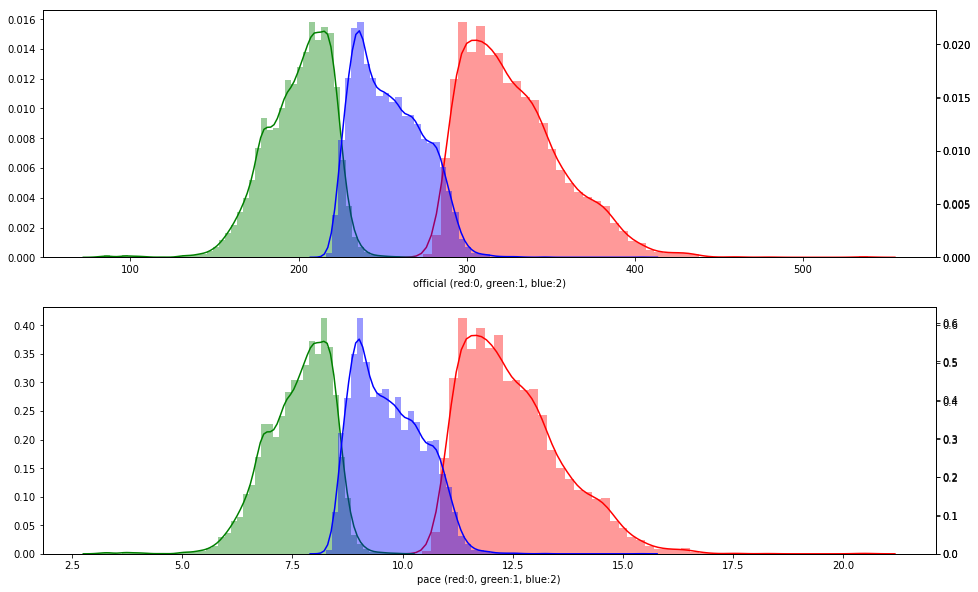

In [45]:
f,(ax,ax_mid) = plt.subplots(nrows=2, figsize=(16,10))

ax2 = ax.twinx()
ax3 = ax.twinx()
sb.distplot(data_3[data_3['labels'] == 0]['official'], hist=True, kde=True,ax=ax,color='red')
sb.distplot(data_3[data_3['labels'] == 1]['official'], hist=True, kde=True,ax=ax2,color='green')
sb.distplot(data_3[data_3['labels'] == 2]['official'], hist=True, kde=True,ax=ax3,color='blue')

ax_mid2 = ax_mid.twinx()
ax_mid3 = ax_mid.twinx()
sb.distplot(data_3[data_3['labels'] == 0]['pace'], hist=True, kde=True,ax=ax_mid,color='red')
sb.distplot(data_3[data_3['labels'] == 1]['pace'], hist=True, kde=True,ax=ax_mid2,color='green')
sb.distplot(data_3[data_3['labels'] == 2]['pace'], hist=True, kde=True,ax=ax_mid3,color='blue')

ax.set_xlabel('official (red:0, green:1, blue:2)')
ax_mid.set_xlabel('pace (red:0, green:1, blue:2)')

plt.show()

In [46]:
KMEAN.cluster_centers_

array([[  0.53976532,   1.73570497,  12.51364686,  31.98928851,
         65.2142466 , 136.87198733, 144.74188489, 176.63280499,
        220.03722667, 265.88498976, 309.82191656],
       [  0.31342663,   1.1488153 ,   7.63370445,  22.23165512,
         44.46633643,  89.58812942,  94.53266523, 112.62125606,
        136.88343217, 162.41445961, 188.45940141],
       [  0.56922168,   2.018234  ,   9.70404947,  27.01748016,
         54.19931369, 110.19216107, 116.33703275, 139.60778997,
        171.36196438, 205.3379529 , 239.60223873]])

In [47]:
data_3.head()

,gender,age_group,pace,5k,10k,20k,half,25k,30k,35k,40k,official,labels
0,0,2,3.27,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,1
1,1,0,5.30,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,1
2,0,1,3.08,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,1
3,1,0,5.37,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,1
4,0,1,3.10,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,1
